## Predicting Asteroid Impact Using ML - Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
impact_df = pd.read_csv('../datasets/impacts.csv')
orbit_df = pd.read_csv('../datasets/orbits.csv')

In [4]:
# Calling head method on impact_df data to print the first several rows of the data
impact_df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [6]:
# Calling head method on orbit_df data to print the first several rows of the data
orbit_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [7]:
print("Size of impact_df:",impact_df.shape)
print("Size of orbit_df:",orbit_df.shape)

Size of impact_df: (683, 11)
Size of orbit_df: (15635, 15)


In [8]:
# Counting the number of missing values in each column of impact_df and sorting them.
missing_impact = pd.concat([impact_df.isnull().sum(), 100 * impact_df.isnull().mean()], axis=1)
missing_impact.columns=['count', '%']
missing_impact.sort_values(by='count')

,count,%
Object Name,0,0.0
Period Start,0,0.0
Period End,0,0.0
Possible Impacts,0,0.0
Cumulative Impact Probability,0,0.0
Asteroid Velocity,0,0.0
Asteroid Magnitude,0,0.0
Asteroid Diameter (km),0,0.0
Cumulative Palermo Scale,0,0.0
Maximum Palermo Scale,0,0.0


In [28]:
# Counting the number of missing values in each column of orbit_df and sorting them.
missing_orbit = pd.concat([orbit_df.isnull().sum(), 100 * orbit_df.isnull().mean()], axis=1)
missing_orbit.columns=['count', '%']
missing_orbit.sort_values(by='count')

,count,%
Object Name,0,0.0
Object Classification,0,0.0
Epoch (TDB),0,0.0
Orbit Axis (AU),0,0.0
Orbit Eccentricity,0,0.0
Orbit Inclination (deg),0,0.0
Perihelion Argument (deg),0,0.0
Node Longitude (deg),0,0.0
Mean Anomoly (deg),0,0.0
Perihelion Distance (AU),0,0.0


In [9]:
# Checking for missing values in impact_df
impact_df.isnull().sum()

Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64

In [10]:
# Checking for missing values in orbit_df
orbit_df.isnull().sum()

Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          1
dtype: int64

In [11]:
# Checking which row contains the NaN value found in the 'Asteroid Magnitude' column 
orbit_df[orbit_df.isnull()['Asteroid Magnitude'] == True]

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
6896,(2010 AU118),Amor Asteroid,55211,1.6214,0.3059,43.7254,339.6013,35.2163,109.2828,1.1255,2.12,2.06,0.1467,7,NaN


Since there is only one NaN value in the 'Asteroid Magnitude' colum, we can drop this value instead of artificially filling it.

In [13]:
# Dropping the one missing value
orbit_df.dropna(inplace=True)

In [14]:
# Calling describe method on orbit_df for a statistical summary of the numerical columns
orbit_df.describe()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
count,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000
mean,57365.532749,1.781012,0.449703,12.939206,181.499448,172.680946,172.838928,0.914899,2.647120,2.473433,0.101881,21.886210,22.286336
std,1167.148181,0.603247,0.176002,11.300910,103.858105,103.381604,116.125667,0.240310,1.142688,1.517633,0.105940,33.632956,3.016002
min,44221.000000,0.547600,0.004400,0.014700,0.008100,0.007000,0.003100,0.070700,0.800000,0.410000,0.000000,1.000000,9.450000
25%,57800.000000,1.323600,0.322725,4.762175,92.432975,82.248100,62.030375,0.776725,1.740000,1.520000,0.018700,6.000000,19.900000
50%,57800.000000,1.735500,0.462950,9.196350,183.300400,172.180350,167.750600,0.965800,2.520000,2.290000,0.062000,11.000000,22.200000
75%,57800.000000,2.208675,0.572900,18.508175,270.908350,253.664375,281.445200,1.080300,3.420000,3.280000,0.159175,23.000000,24.600000
max,57800.000000,21.395400,0.969500,154.375100,359.994200,359.998100,359.998200,1.300000,41.540000,98.970000,0.706900,635.000000,33.200000


In [15]:
# Calling describe method on impact_df for a statistical summary of the numerical columns
impact_df.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


In [16]:
# Calling info method on orbit_df to see a summary of the data
orbit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15634 non-null  object 
 1   Object Classification                     15634 non-null  object 
 2   Epoch (TDB)                               15634 non-null  int64  
 3   Orbit Axis (AU)                           15634 non-null  float64
 4   Orbit Eccentricity                        15634 non-null  float64
 5   Orbit Inclination (deg)                   15634 non-null  float64
 6   Perihelion Argument (deg)                 15634 non-null  float64
 7   Node Longitude (deg)                      15634 non-null  float64
 8   Mean Anomoly (deg)                        15634 non-null  float64
 9   Perihelion Distance (AU)                  15634 non-null  float64
 10  Aphelion Distance (AU)            

In [17]:
# Calling info method on impact_df to see a summary of the data
impact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


In [18]:
# Filtering impact_df columns by data type 'object'
impact_df.select_dtypes('object')

,Object Name,Maximum Torino Scale
0,2006 WP1,0
1,2013 YB,0
2,2008 US,0
3,2010 VR139,0
4,2015 ME131,0
...,...,...
678,2014 KW76,0
679,2012 FN,0
680,101955 Bennu (1999 RQ36),(*)
681,410777 (2009 FD),(*)


In [19]:
impact_df['Object Name'].value_counts()

2006 WP1           1
2006 UJ185         1
2016 WG            1
2012 YR1           1
2007 VF189         1
                  ..
2011 AY22          1
2006 HX57          1
2008 PK9           1
2017 BG92          1
29075 (1950 DA)    1
Name: Object Name, Length: 683, dtype: int64

In [20]:
# Filtering orbit_df columns by data type 'object'
orbit_df.select_dtypes('object')

,Object Name,Object Classification
0,433 Eros,Amor Asteroid
1,719 Albert,Amor Asteroid
2,887 Alinda,Amor Asteroid
3,1036 Ganymed,Amor Asteroid
4,1221 Amor,Amor Asteroid
...,...,...
15630,(2017 CX1),Apollo Asteroid
15631,(2017 CO5),Amor Asteroid
15632,(2017 CP5),Amor Asteroid
15633,(2017 CR5),Apollo Asteroid


In [21]:
# Counting number of asteroids according to 'Object Classification'
orbit_df['Object Classification'].value_counts()

Apollo Asteroid              6940
Amor Asteroid                5917
Apollo Asteroid (Hazard)     1520
Aten Asteroid                 987
Aten Asteroid (Hazard)        155
Amor Asteroid (Hazard)         99
Apohele Asteroid               11
Apohele Asteroid (Hazard)       5
Name: Object Classification, dtype: int64

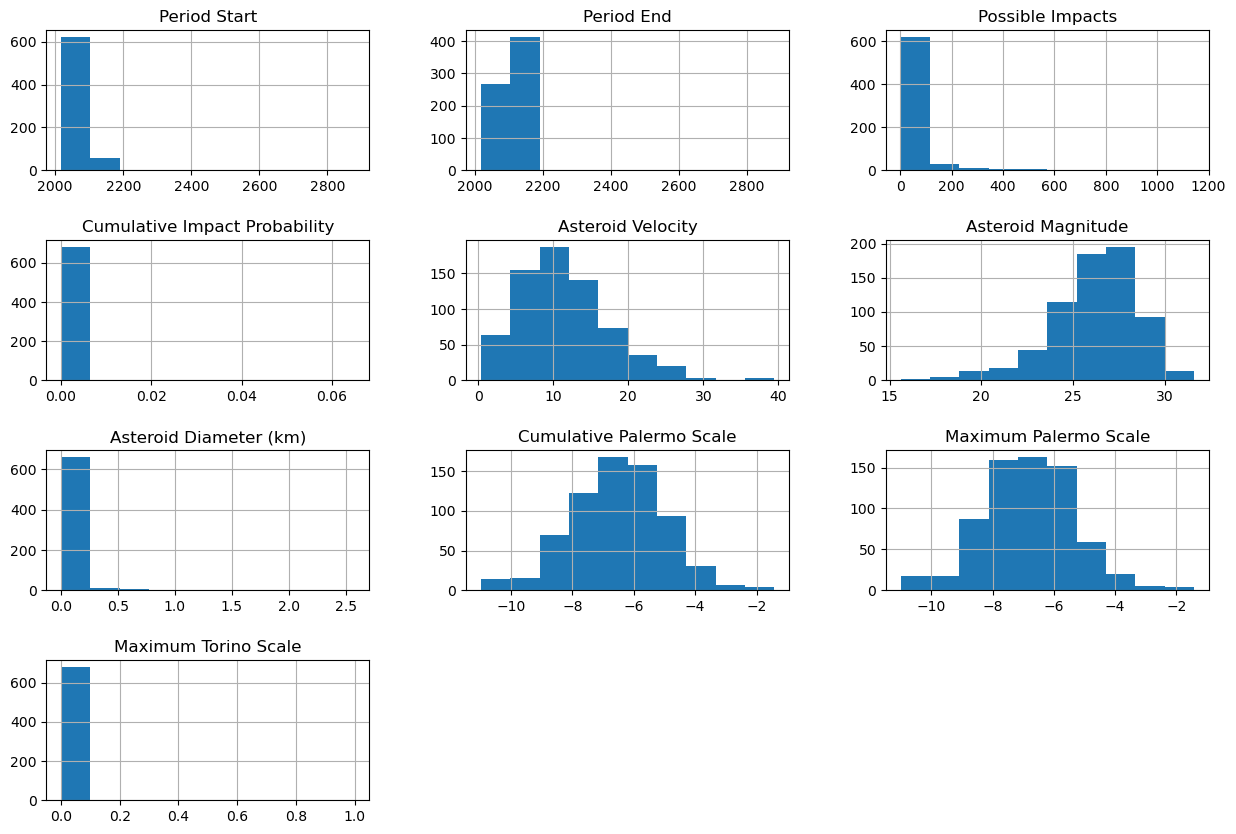

In [33]:
#Calling `hist` method to plot histograms of each of the numeric features on impact_df
impact_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [23]:
# Checking for unique values in 'Maximum Torino Scale' column
impact_df['Maximum Torino Scale'].unique()

array(['0', '(*)'], dtype=object)

In [24]:
# Replacing string values with interger values
impact_df['Maximum Torino Scale'].replace({'0': 0, '(*)': 1}, inplace=True)

In [25]:
# Counting values
impact_df['Maximum Torino Scale'].value_counts()

0    680
1      3
Name: Maximum Torino Scale, dtype: int64

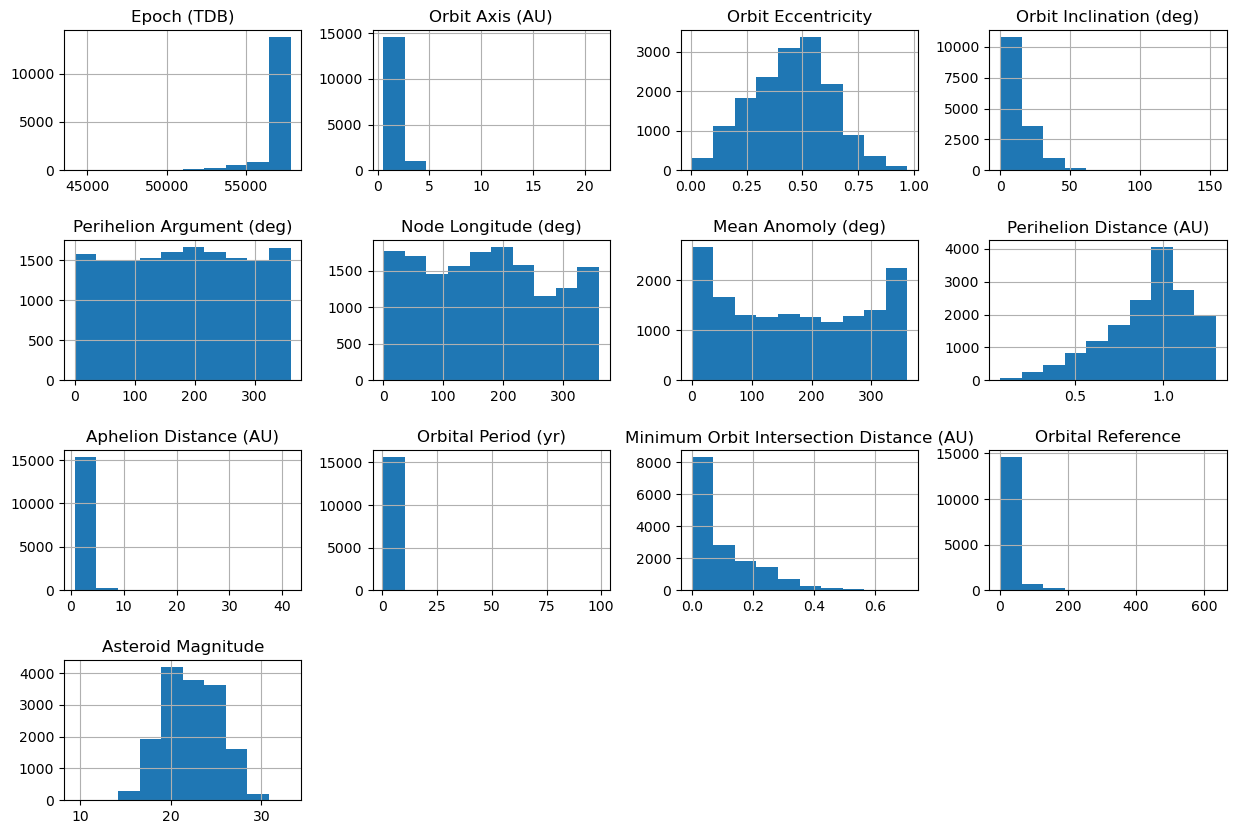

In [34]:
#Calling `hist` method to plot histograms of each of the numeric features on orbit_df
orbit_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [35]:
# Checking for unique values in 'Orbit Eccentricity' column in orbit_df
orbit_df['Orbit Eccentricity'].unique()

array([0.2226, 0.5479, 0.5671, ..., 0.0342, 0.6434, 0.1004])

In [38]:
# Counting values for 'Orbit Eccentricity' in orbit_df
orbit_df['Orbit Eccentricity'].value_counts()

0.4670    14
0.5748    10
0.5761    10
0.5482    10
0.3611    10
          ..
0.2566     1
0.2048     1
0.3072     1
0.3457     1
0.1004     1
Name: Orbit Eccentricity, Length: 6279, dtype: int64

In [39]:
# Checking for unique values in 'Asteroid Magnitude' column in orbit_df
orbit_df['Asteroid Magnitude'].unique()

array([11.16, 15.5 , 13.4 ,  9.45, 17.7 , 16.9 , 14.8 , 15.6 , 13.2 ,
       14.23, 16.25, 15.54, 14.85, 16.84, 12.4 , 18.97, 14.93, 13.9 ,
       15.75, 13.92, 15.2 , 16.  , 16.56, 16.8 , 17.3 , 16.05, 18.8 ,
       17.94, 15.25, 17.2 , 13.87, 14.6 , 20.2 , 15.21, 17.52, 16.2 ,
       15.38, 14.1 , 14.84, 16.5 , 15.3 , 15.8 , 15.9 , 19.03, 18.3 ,
       16.75, 12.9 , 16.4 , 15.82, 14.7 , 18.95, 17.9 , 15.99, 18.4 ,
       14.4 , 17.1 , 17.4 , 20.7 , 18.2 , 19.4 , 18.  , 12.6 , 14.9 ,
       14.  , 16.6 , 13.8 , 19.7 , 17.  , 14.2 , 15.4 , 16.1 , 18.7 ,
       17.8 , 15.1 , 18.5 , 19.2 , 18.9 , 16.7 , 18.6 , 16.3 , 19.3 ,
       17.6 , 15.7 , 14.3 , 20.4 , 13.6 , 19.1 , 18.1 , 19.5 , 19.6 ,
       20.6 , 19.9 , 20.  , 17.5 , 19.  , 22.7 , 15.  , 20.8 , 19.8 ,
       21.6 , 21.1 , 20.5 , 20.19, 20.3 , 20.1 , 21.2 , 22.  , 21.7 ,
       21.  , 21.9 , 20.9 , 24.2 , 21.4 , 21.3 , 23.  , 21.8 , 22.6 ,
       21.5 , 22.9 , 22.1 , 24.  , 24.3 , 22.2 , 23.3 , 25.2 , 25.5 ,
       23.5 , 28.6 ,

In [40]:
# Counting values for 'Asteroid Magnitude' in orbit_df
orbit_df['Asteroid Magnitude'].value_counts()

20.70    204
21.00    198
20.80    194
20.00    188
24.40    187
        ... 
22.51      1
27.91      1
25.21      1
26.87      1
24.74      1
Name: Asteroid Magnitude, Length: 477, dtype: int64

## Feature Selection

<AxesSubplot:>

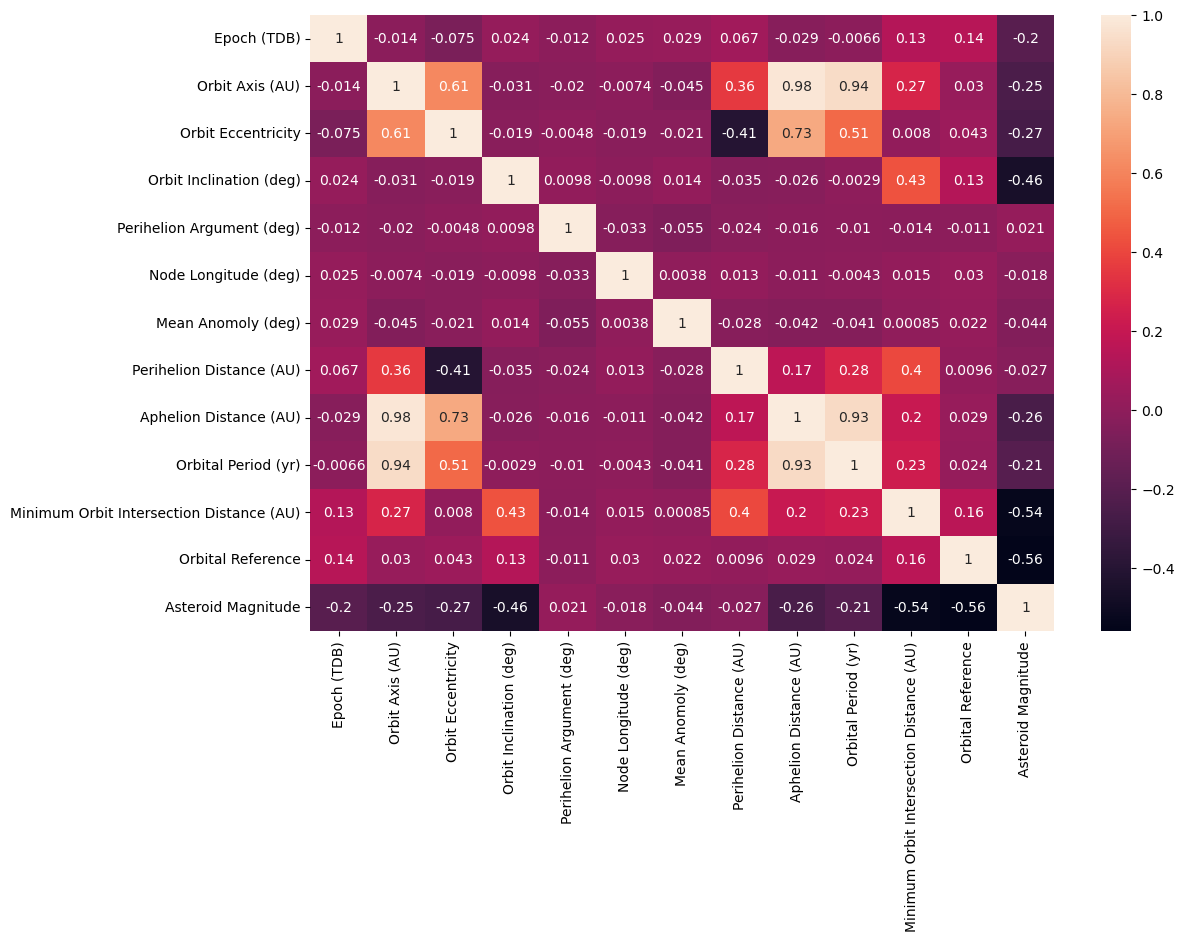

In [27]:
# Checking feature correlation using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(orbit_df.corr(), annot=True)

<AxesSubplot:>

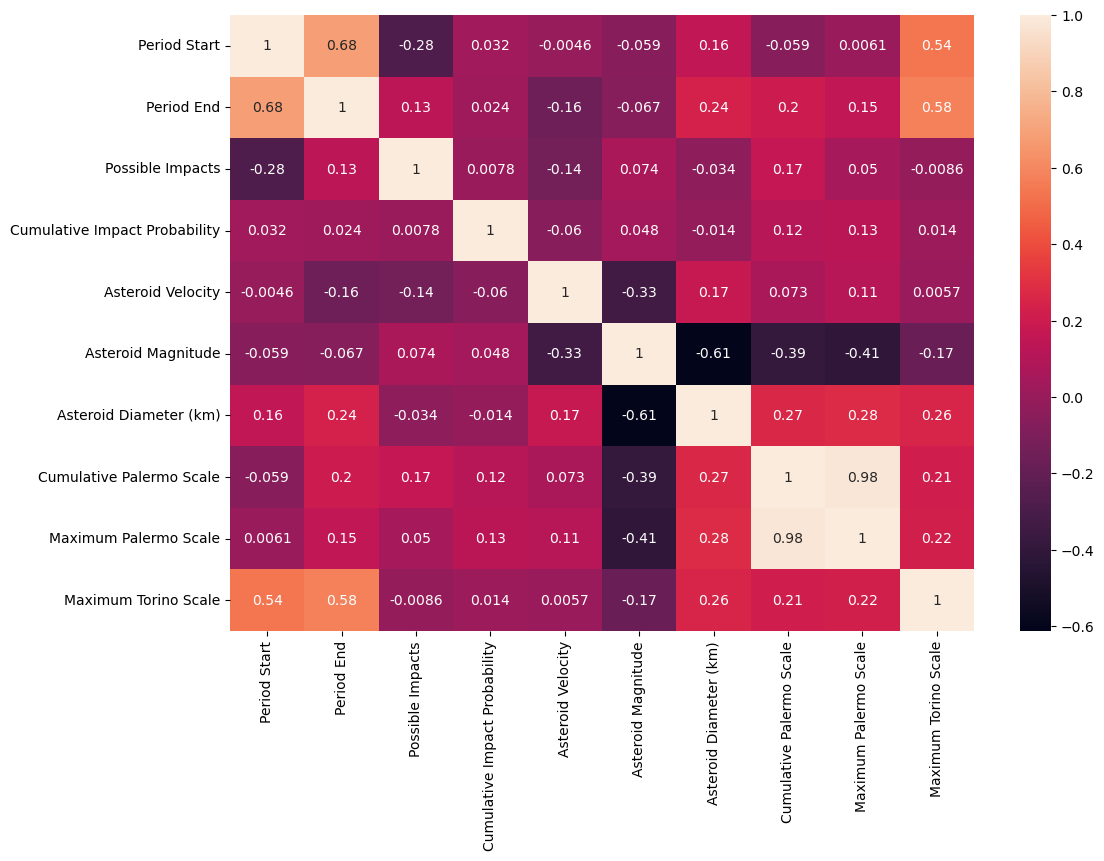

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(impact_df.corr(), annot=True)

In [29]:
# Columns in orbit_df
orbit_df.columns


Index(['Object Name', 'Object Classification', 'Epoch (TDB)',
       'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude'],
      dtype='object')

In [41]:
# Columns in impact_df
impact_df.columns

Index(['Object Name', 'Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

<AxesSubplot:xlabel='Epoch (TDB)'>

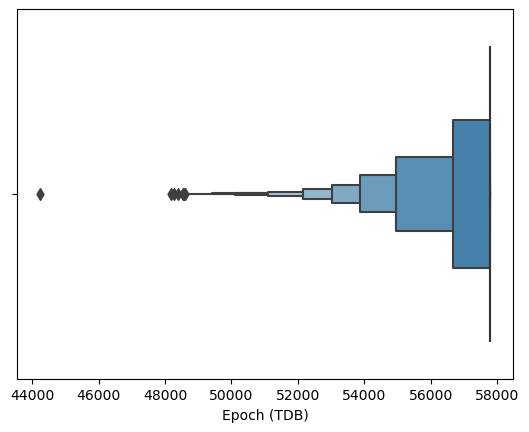

In [30]:
sns.boxenplot(x='Epoch (TDB)', data=orbit_df)


In [31]:
# Exporting cleaned up data to new file
orbit_df.to_csv('../datasets/final_orbit.csv', index=False)


In [32]:
# Exporting cleaned up data to new file
impact_df.to_csv('../datasets/final_impact.csv', index=False)
